# Summer Anaytics Capstone Project 2025

## Problem: Dynamic Pricing for Urban Parking Lots


In [12]:
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

Importing Data and Processing Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn


## Data Cleaning

In [14]:
df = pd.read_csv('/content/sample_data/dataset.csv')
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [15]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [17]:
df.isnull().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


In [18]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [21]:
df['timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')

df.drop(['LastUpdatedDate','LastUpdatedTime'],axis=1,inplace=True)

df = df.sort_values(by = 'timestamp')

In [23]:
df[['timestamp']].head()

,timestamp
0,2016-10-04 07:59:00
5248,2016-10-04 07:59:00
3936,2016-10-04 07:59:00
6560,2016-10-04 07:59:00
17056,2016-10-04 07:59:00


## EDA

Occupancy vs Capacity

In [25]:
df['occupancy_rate'] = df['Occupancy']/df['Capacity']
df['occupancy_rate'].describe()

,occupancy_rate
count,18368.000000
mean,0.509119
std,0.246143
min,0.003466
25%,0.307110
50%,0.496124
75%,0.701031
max,1.041344


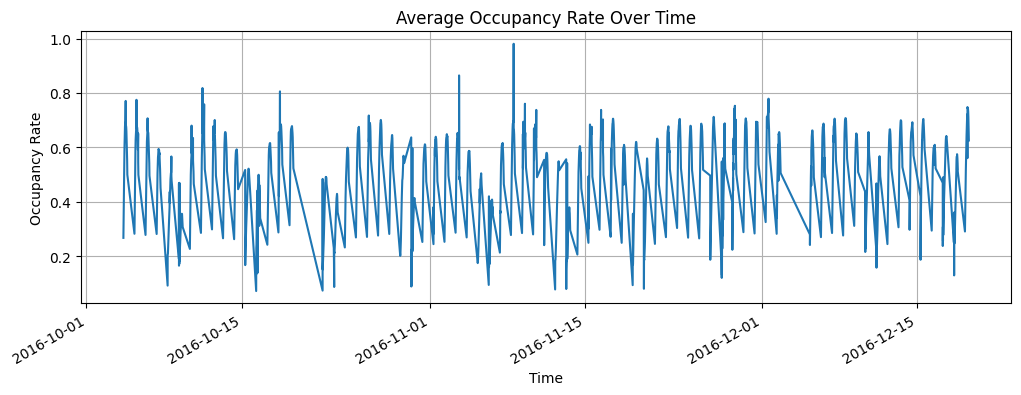

In [26]:


df.groupby('timestamp')['occupancy_rate'].mean().plot(figsize=(12,4))
plt.title('Average Occupancy Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.grid()
plt.show()


Quee Lenght Distribution

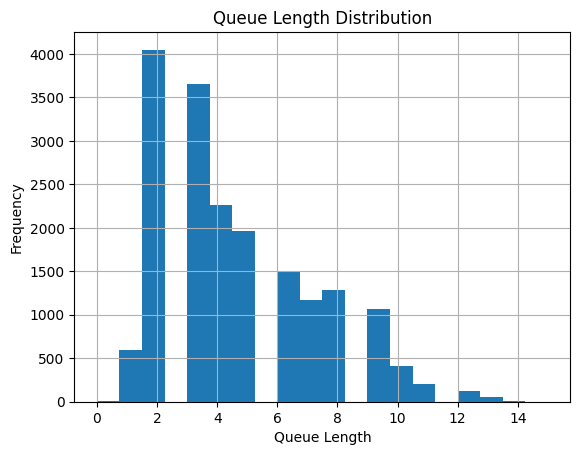

In [29]:
df['QueueLength'].hist(bins=20)
plt.title('Queue Length Distribution')
plt.xlabel('Queue Length')
plt.ylabel('Frequency')
plt.show()


Traffic Congestion and special days

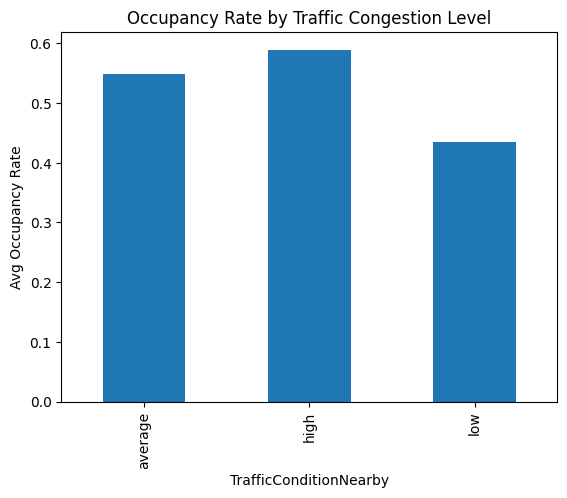

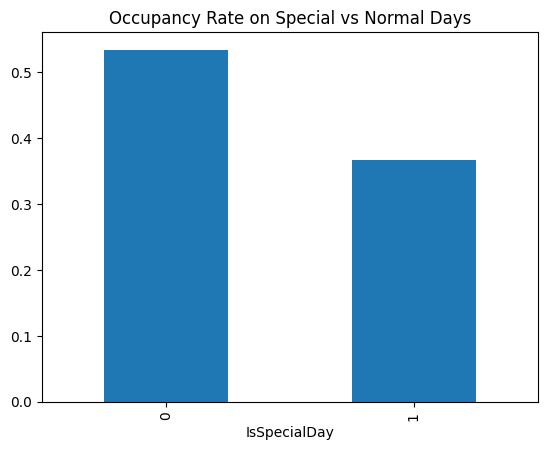

In [30]:
df.groupby('TrafficConditionNearby')['occupancy_rate'].mean().plot(kind='bar')
plt.title('Occupancy Rate by Traffic Congestion Level')
plt.ylabel('Avg Occupancy Rate')
plt.show()

df.groupby('IsSpecialDay')['occupancy_rate'].mean().plot(kind='bar')
plt.title('Occupancy Rate on Special vs Normal Days')
plt.show()


Vehical Type

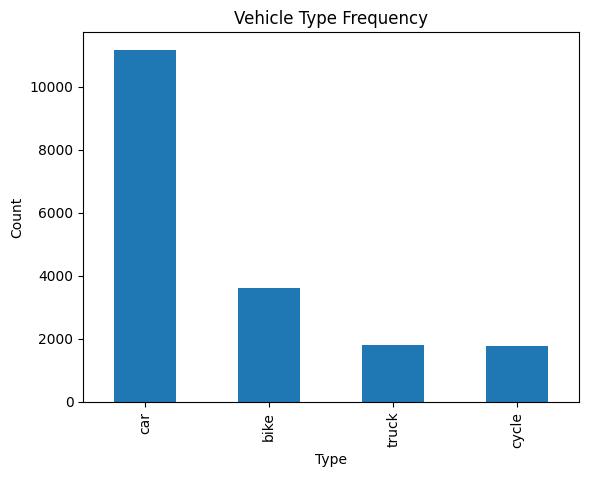

In [31]:
df['VehicleType'].value_counts().plot(kind='bar')
plt.title('Vehicle Type Frequency')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## Model-1 Linera Pricing

In [33]:

df['price'] = 10.0

alpha = 0.5


for ID in df['ID'].unique():
    lot_df = df[df['ID'] == ID].copy()
    lot_df = lot_df.sort_values('timestamp')

    for i in range(1, len(lot_df)):
        occ_rate = lot_df.iloc[i-1]['occupancy'] / lot_df.iloc[i-1]['capacity']
        prev_price = lot_df.iloc[i-1]['price']
        new_price = prev_price + alpha * occ_rate
        df.loc[lot_df.index[i], 'price'] = new_price


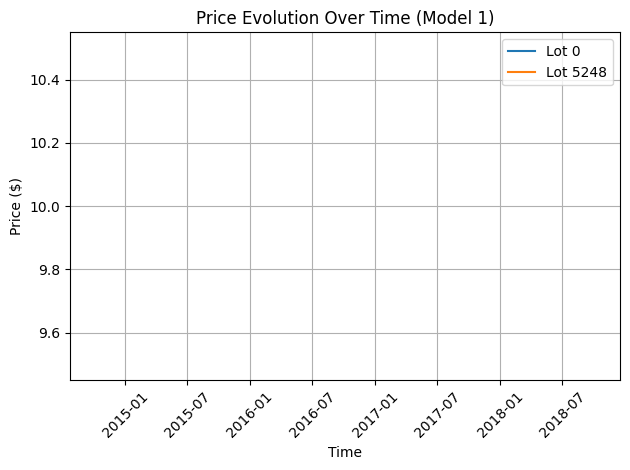

(Timestamp('2016-10-04 07:59:00'), Timestamp('2016-12-19 16:30:00'))

In [35]:


sample_lots = df['ID'].unique()[:2]

for ID in sample_lots:
    temp = df[df['ID'] == ID]
    plt.plot(temp['timestamp'], temp['price'], label=f'Lot {ID}')

plt.title('Price Evolution Over Time (Model 1)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['timestamp'].min(), df['timestamp'].max()



## Model-2 Demad_based pricing

In [36]:

df['occupancy_rate'] = df['Occupancy'] / df['Capacity']


vehicle_weights = {'cycle': 0.5, 'bike': 1.0, 'car': 1.5, 'truck': 2.0}
df['vehicle_weight'] = df['VehicleType'].map(vehicle_weights)


traffic_map = {'low': 0, 'average': 1, 'high': 2}
df['traffic_level_encoded'] = df['TrafficConditionNearby'].map(traffic_map)


In [37]:

a, b, c, d, e = 1.2, 0.8, 0.5, 0.7, 0.6

df['raw_demand'] = (
    a * df['occupancy_rate'] +
    b * df['QueueLength'] -
    c * df['traffic_level_encoded'] -
    d * df['IsSpecialDay'] +
    e * df['vehicle_weight']
)


In [38]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['normalized_demand'] = scaler.fit_transform(df[['raw_demand']])

lambda_ = 0.5
base_price = 10.0

df['price_model2'] = base_price * (1 + lambda_ * df['normalized_demand'])

df['price_model2'] = df['price_model2'].clip(lower=5, upper=20)


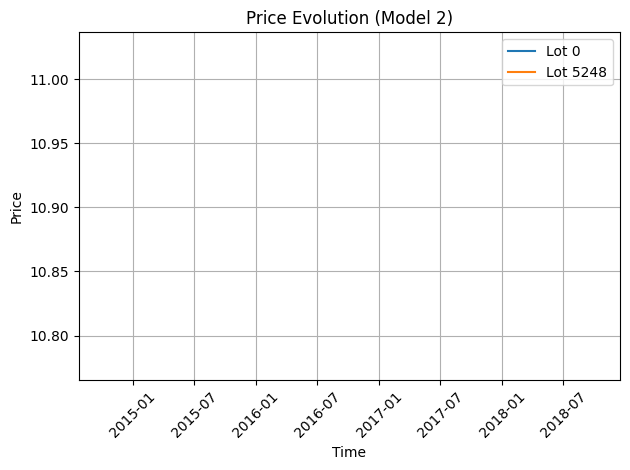

In [40]:
for ID in df['ID'].unique()[:2]:
    temp = df[df['ID'] == ID]
    plt.plot(temp['timestamp'], temp['price_model2'], label=f'Lot {ID}')

plt.title("Price Evolution (Model 2)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## Real Time Data Streaming Using Pathways

Raed the streaming csv

In [52]:


stream = pw.demo.replay_csv(
    "/content/sample_data/dataset.csv",
    schema=pw.schema_from_csv("/content/sample_data/dataset.csv"),
    input_rate=1000
)



In [53]:
df.to_csv("stream.csv", index=False)


In [54]:
import pathway as pw

# Step A: Read CSV in streaming mode
stream = pw.demo.replay_csv(
    "stream.csv",
    schema=pw.schema_from_csv("stream.csv"),
    input_rate=1000  # 1 row per second
)


In [56]:
@pw.udf
def traffic_num(level: str) -> int:
    return {"low": 0, "average": 1, "high": 2}.get(level, 1)

@pw.udf
def vehicle_weight(v: str) -> float:
    return {"cycle": 0.5, "bike": 1.0, "car": 1.5, "truck": 2.0}.get(v, 1.0)

stream = stream.with_columns(
    occupancy_rate=stream.Occupancy / stream.Capacity,
    traffic_encoded=traffic_num(stream.TrafficConditionNearby),
    vehicle_weight=vehicle_weight(stream.VehicleType)
)


In [57]:
@pw.udf
def calc_price(occ_rate, queue, traffic, special, veh_wt) -> float:
    demand_raw = 1.2 * occ_rate + 0.8 * queue - 0.5 * traffic - 0.7 * special + 0.6 * veh_wt
    norm = min(1.0, max(0.0, (demand_raw - 1) / 4))
    price = 10.0 * (1 + 0.5 * norm)
    return round(min(20.0, max(5.0, price)), 2)

stream = stream.with_columns(predicted_price=calc_price(
    stream.occupancy_rate,
    stream.QueueLength,
    stream.traffic_encoded,
    stream.IsSpecialDay,
    stream.vehicle_weight
))


In [60]:
pw.io.jsonlines.write(stream.select(
    stream.timestamp,
    stream.ID,
    stream.predicted_price
), filename="output.json1")

pw.run()


Output()

## Bokeh Visualisation

In [61]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
from bokeh.palettes import Category10

output_notebook()


In [62]:

sample_lots = df['ID'].unique()[:2]


sources = {}
for lot in sample_lots:
    temp = df[df['ID'] == lot].copy()
    temp = temp.sort_values('timestamp')
    temp['timestamp'] = pd.to_datetime(temp['timestamp'])

    sources[lot] = ColumnDataSource(temp)


In [63]:
p = figure(
    x_axis_type="datetime",
    title="Dynamic Price Evolution (Model 2)",
    width=800,
    height=400
)

colors = Category10[10]

for i, lot in enumerate(sample_lots):
    p.line(
        x='timestamp',
        y='price_model2',
        source=sources[lot],
        legend_label=f"Lot {lot}",
        line_width=2,
        color=colors[i]
    )

p.xaxis.axis_label = "Timestamp"
p.yaxis.axis_label = "Predicted Price ($)"
p.legend.location = "top_left"

show(p)
